In [11]:
import geopandas as gpd
import fiona
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [12]:
# Define the folder containing the files
root_folder = "/Users/david/Desktop/DSSG/Michaels_Data/All_Layers"
# List all .gdb directories in the folder
gdb_files = []
for dirpath, dirnames, filenames in os.walk(root_folder):
    # Check if the folder contains a "commondata" folder
    if "commondata" in dirnames:
        commondata_folder = os.path.join(dirpath, "commondata")
        commondata_folder = os.path.normpath(commondata_folder)

        # List all .gdb files in the "commondata" folder
        for f in os.listdir(commondata_folder):
            if f.endswith('.gdb'):
                gdb_files.append(os.path.join(commondata_folder, f))

# Print the collected .gdb files
for gdb in gdb_files:
    print(gdb)
print("GDB Files:", gdb_files)


\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\commondata\myproject16.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\commondata\scratch.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\חלקות\commondata\myproject16.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\חלקות\commondata\scratch.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\מרקמים\commondata\myproject16.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\מרקמים\commondata\scratch.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\קונטור בניינים\commondata\jps_reka.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\קונטור בניינים\commondata\scratch.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\מרקמים\רגישות\commondata\myproject16.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\קונטור בניינים\commondata\scratch.gdb
\Users\david\Desktop\DSSG\Michaels_Data\All_Layers\רגישות\commondata\myproject16.gdb
GDB Files: ['\\Us

In [13]:
# Choose a specific .gdb file (first one in this case)
gdb_file = gdb_files[4]  # Modify if you want to choose a different .gdb

# List the layers in the selected .gdb
layers = fiona.listlayers(gdb_file)
print("Layers in the selected GDB:", layers)

# Choose a specific layer within the .gdb
textures_layer = layers[0]  # Modify if you want to choose a different layer

# Load the specific layer
gdf = gpd.read_file(gdb_file, layer=textures_layer)

# choose column to categorize by 
# 'hearot' for Regishut (file 0)
# None for Binyanim (file 1)
# None for Helkot (file 2)
# 'סיווג_מרקמים_12042024' for Mirkamim (file 3)
categorize_col = 'סיווג_מרקמים_12042024'
print(gdf.columns)
print(gdf)

Layers in the selected GDB: ['סיווג_מרקמים']
Index(['סוג', 'הערות', 'קטגוריה', 'סיווג_מרקמים_12042024', 'שכונה',
       'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')
       סוג הערות                       קטגוריה         סיווג_מרקמים_12042024  \
0     None     4  בניה ישראלית של העת העכשווית  בניה מודרניסטית קבלנות פרטית   
1     None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
2     None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
3     None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
4     None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
...    ...   ...                           ...                           ...   
2239  None  None                          None                  מתחמי מעצמות   
2240  None  None                          None         מגורים מנדטורי-ישראלי   
2241  None  None                          None         מגורים מנדטורי-ישראלי   
2242  None  Non

In [14]:
print(gdf.head())  # Shows the first 5 rows of the table


    סוג הערות                       קטגוריה         סיווג_מרקמים_12042024  \
0  None     4  בניה ישראלית של העת העכשווית  בניה מודרניסטית קבלנות פרטית   
1  None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
2  None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
3  None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
4  None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   

  שכונה  Shape_Length     Shape_Area  \
0  None   3135.773391  426553.111578   
1  None   1722.702909  147558.587917   
2  None    867.289433   20467.159353   
3  None    582.858161   17635.895367   
4  None    905.787245   16306.314716   

                                            geometry  
0  MULTIPOLYGON (((3914503.352 3730672.601, 39144...  
1  MULTIPOLYGON (((3914939.607 3730959.300, 39149...  
2  MULTIPOLYGON (((3915373.380 3731054.645, 39153...  
3  MULTIPOLYGON (((3915526.992 3730769.933, 39155...  
4  MULTIPOLYGON (((39

1) Simple layer plot (No Categorization)

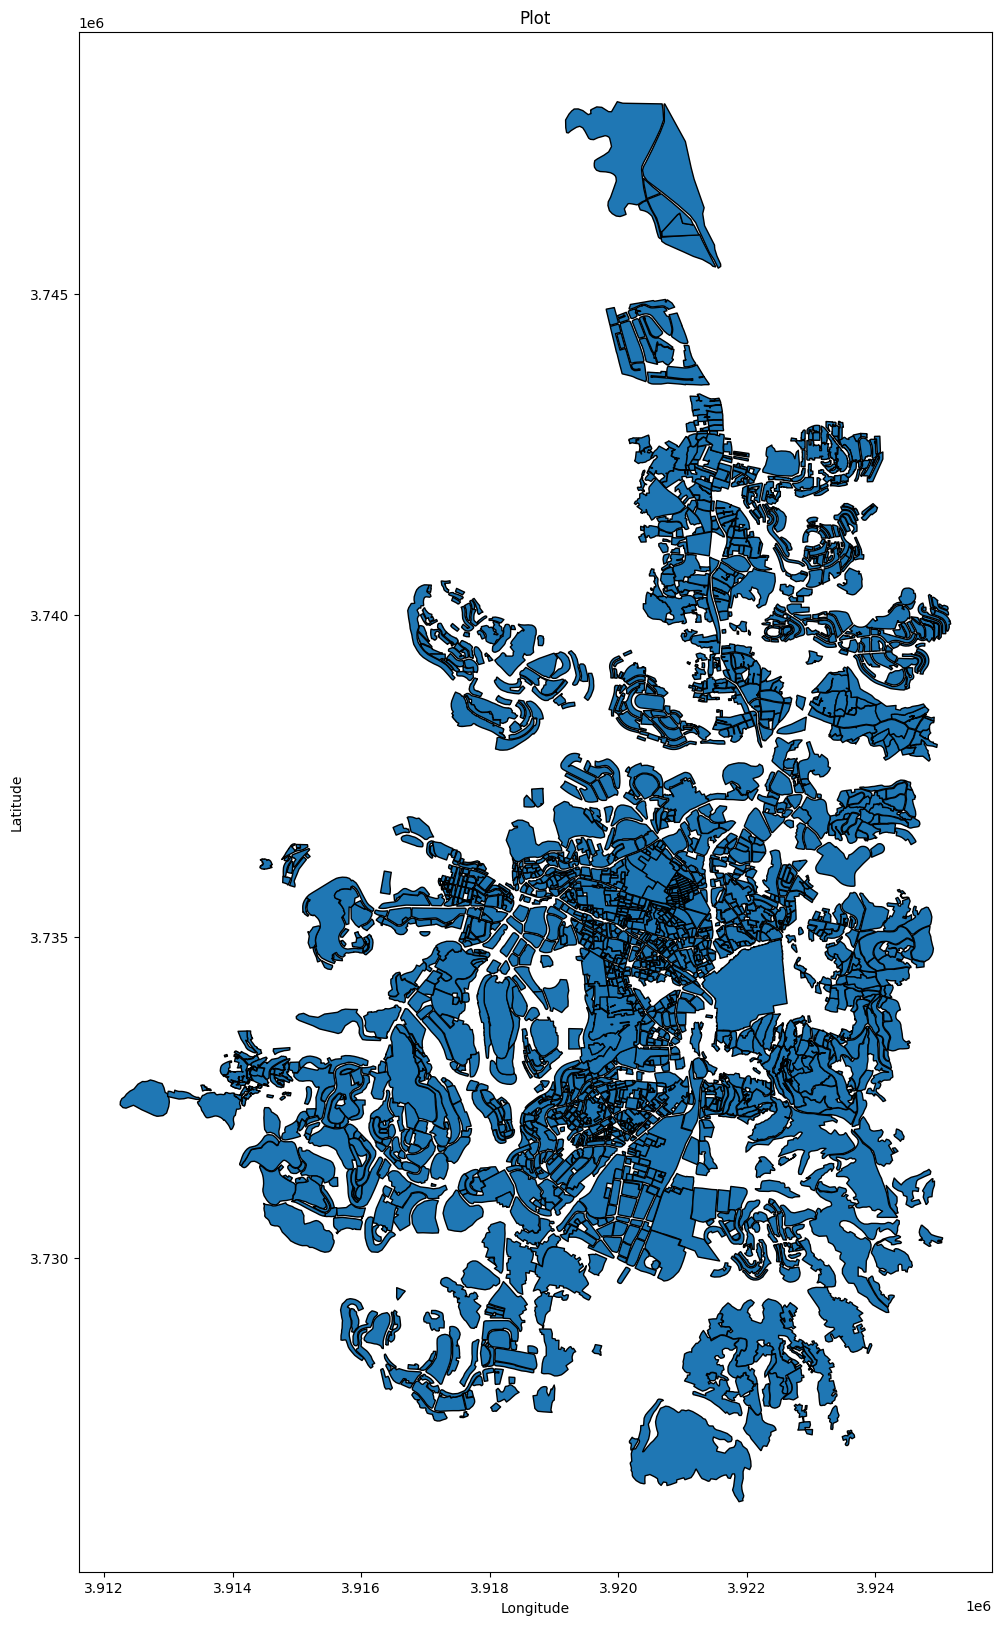

In [15]:
# Plot without categorization
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(ax=ax, edgecolor='k') # No 'column' argument, so no categorization

# Add title and labels
plt.title('Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

2) Simple layer plot (With Categorization)

In [16]:
print(gdf.columns)
print(gdf)

Index(['סוג', 'הערות', 'קטגוריה', 'סיווג_מרקמים_12042024', 'שכונה',
       'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')
       סוג הערות                       קטגוריה         סיווג_מרקמים_12042024  \
0     None     4  בניה ישראלית של העת העכשווית  בניה מודרניסטית קבלנות פרטית   
1     None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
2     None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
3     None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
4     None     4         מרחבי הפרויקט הישראלי               הפרויקט הישראלי   
...    ...   ...                           ...                           ...   
2239  None  None                          None                  מתחמי מעצמות   
2240  None  None                          None         מגורים מנדטורי-ישראלי   
2241  None  None                          None         מגורים מנדטורי-ישראלי   
2242  None  None                          None         מגורי

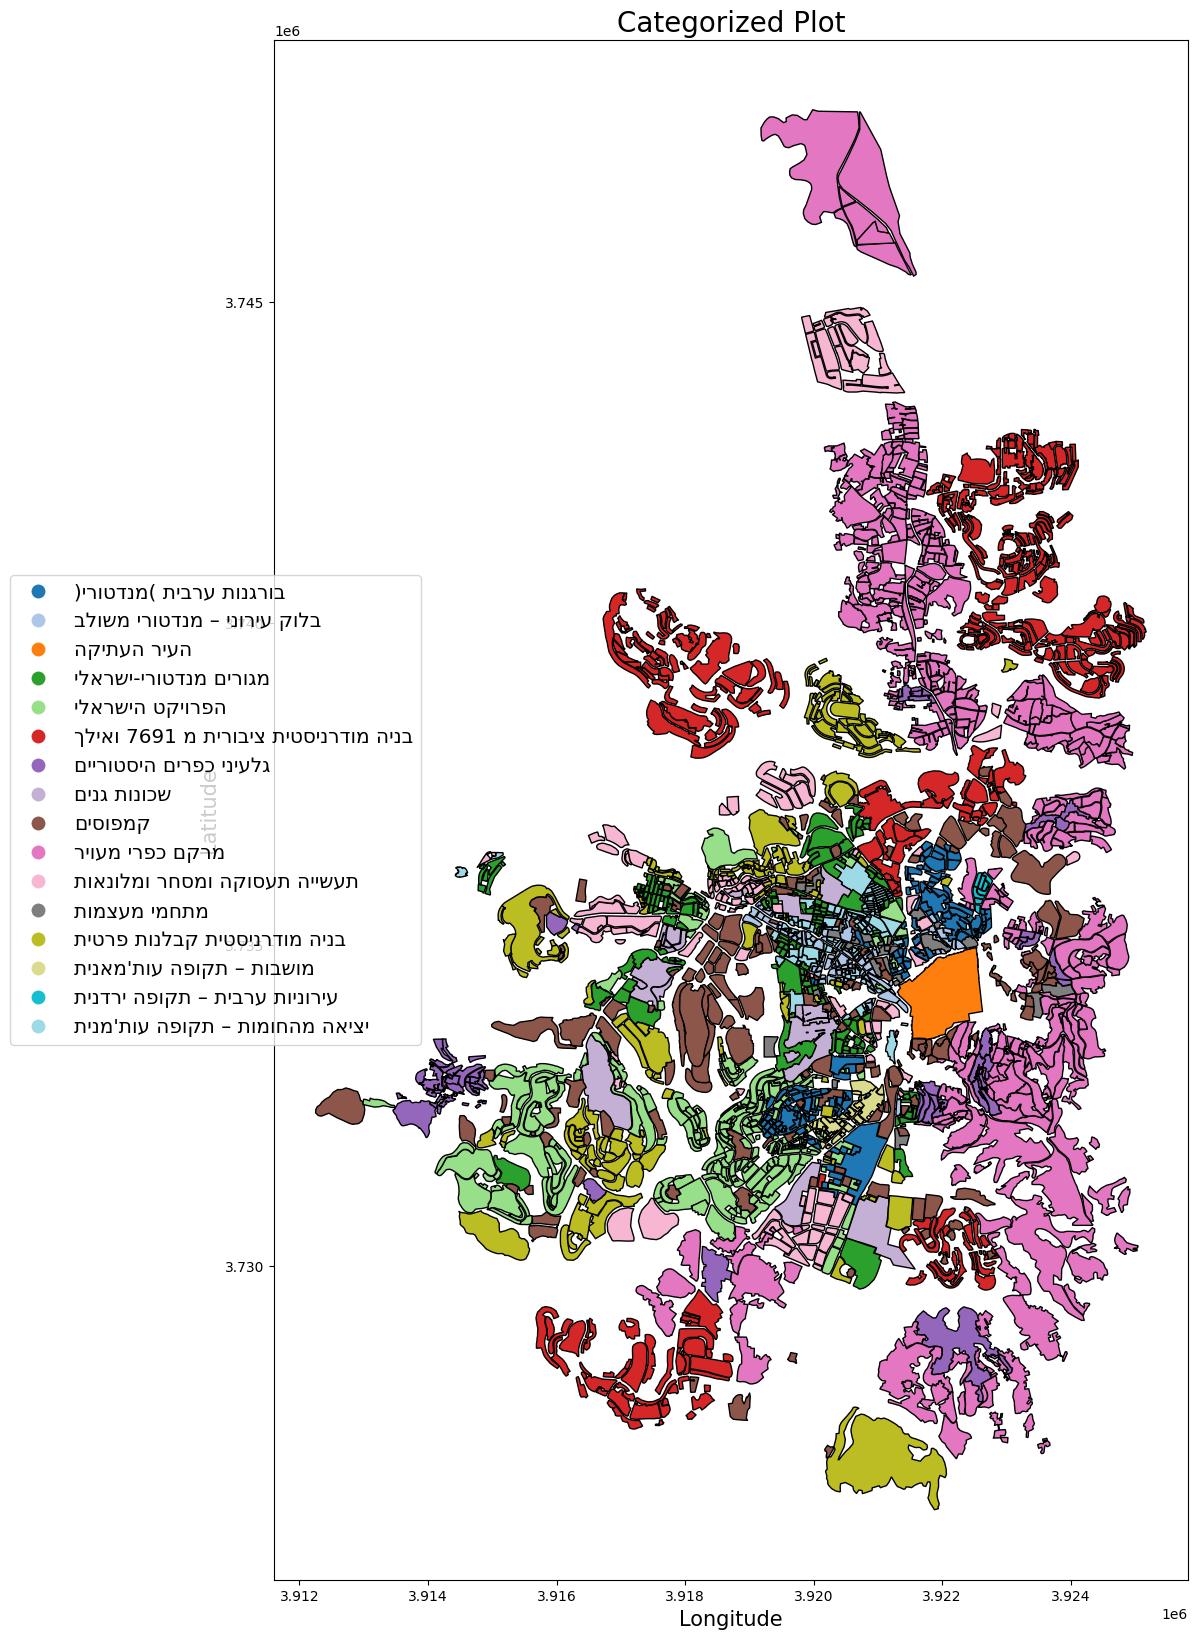

In [20]:
gdf[categorize_col] = gdf[categorize_col].apply(lambda x: x[::-1] if isinstance(x, str) else x)

fig, ax = plt.subplots(figsize=(20, 20))

# Plot with custom legend
gdf.plot(column=categorize_col, ax=ax, legend=True,
         cmap='tab20',  # You can choose any colormap you like
         edgecolor='k',  # Optional: adds black borders around polygons
         legend_kwds={
             'loc': 'center left',  # Position the legend on the left
             'bbox_to_anchor': (-0.3, 0.5),  # Adjust the x and y position of the legend
             'fontsize': 'x-large',  # Increase the font size of the legend
             'title_fontsize': 'x-large'  # Increase the font size of the legend title
         })

# Add title and labels
plt.title('Categorized Plot', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

# Show plot
plt.show()

3) Layer plot with modified legend

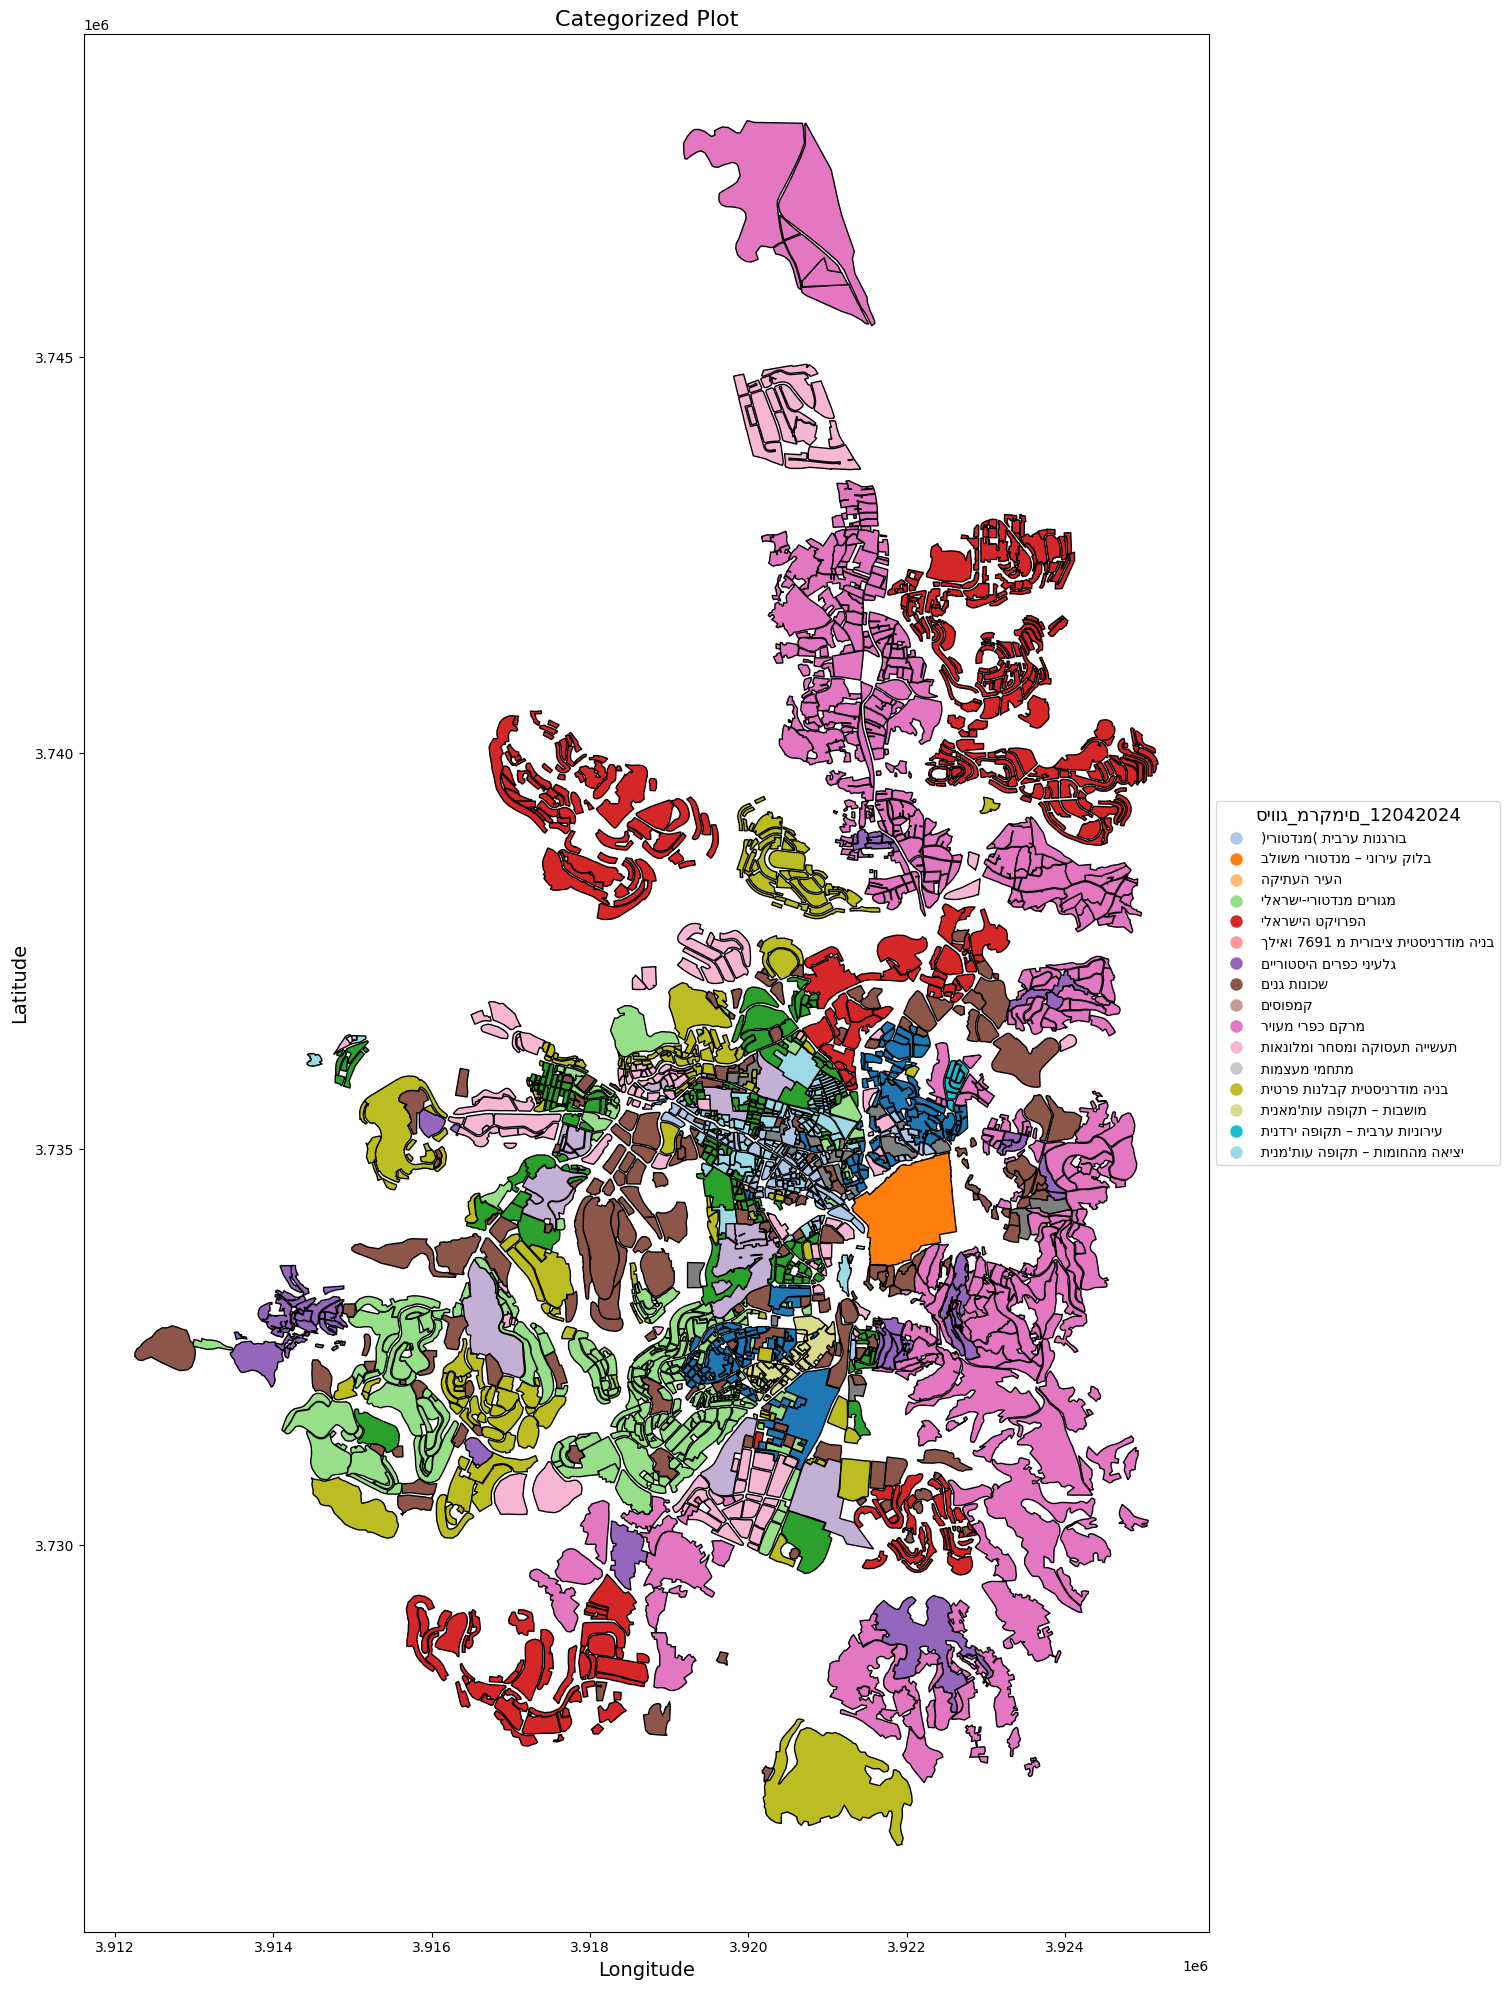

In [18]:
# Convert categories to numeric values
gdf['numeric_category'] = gdf['סיווג_מרקמים_12042024'].astype('category').cat.codes

# Plot with categorization
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(column=categorize_col, ax=ax, legend=False,
         cmap='tab20',  # You can choose any colormap you like
         edgecolor='k')  # Optional: adds black borders around polygons

# Generate custom legend handles
categories = gdf['סיווג_מרקמים_12042024'].astype('category').cat.categories
cmap = plt.get_cmap('tab20')
norm = plt.Normalize(vmin=gdf['numeric_category'].min(), vmax=gdf['numeric_category'].max())

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(cat_code)), markersize=10, linestyle='') 
           for cat_code in range(len(categories))]
labels = [cat for cat in categories]

# Add custom legend
ax.legend(handles=handles, labels=labels, title='סיווג_מרקמים_12042024', title_fontsize='13', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='10')

# Add title and labels
plt.title('Categorized Plot', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Adjust layout to make space for the legend
plt.tight_layout()

# Show plot
plt.show()